# GROUP NAMES:

- Gilbert Andze Tsoungui 	211262656 christ18
- Jaskaran Garha	214314439	garhajas
- David  Geller 		214404255 	dgeller
- William Zhen 	214305171 	will636

# This project has been done with jupyter notebook


# Data Source

[Data Source Link](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236)

In [ ]:
# Data Ingestion

#### Our Plan in this project was to use spark to process CSV files coming from the Bureau of Transportation Statistics and use graphframe to load data in which airport are represented as vertices and flight as edges. We have encountered some problems in that process.

* ##### We quickly realized that spark has a lot of dependencies, some of our functions didn't work because we didn't have the right scala version install or the right python version install.
* ##### it 's was easier for us to move to panda and Jupyter because panda only require python



In [10]:
import pandas as pd

------------------------------------------
# 2017 data analysis
------------------------------------------

In [11]:
data_2017 = pd.read_csv('2017.csv')

In [12]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464205 entries, 0 to 464204
Data columns (total 40 columns):
YEAR                     464205 non-null int64
QUARTER                  464205 non-null int64
MONTH                    464205 non-null int64
DAY_OF_MONTH             464205 non-null int64
DAY_OF_WEEK              464205 non-null int64
FL_DATE                  464205 non-null object
OP_UNIQUE_CARRIER        464205 non-null object
OP_CARRIER_AIRLINE_ID    464205 non-null int64
OP_CARRIER               464205 non-null object
ORIGIN_AIRPORT_ID        464205 non-null int64
ORIGIN_AIRPORT_SEQ_ID    464205 non-null int64
ORIGIN_CITY_MARKET_ID    464205 non-null int64
ORIGIN                   464205 non-null object
ORIGIN_CITY_NAME         464205 non-null object
ORIGIN_STATE_ABR         464205 non-null object
ORIGIN_STATE_FIPS        464205 non-null int64
ORIGIN_STATE_NM          464205 non-null object
ORIGIN_WAC               464205 non-null int64
DEST_AIRPORT_ID          464205 non-

In [13]:
data_2017.describe()

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count  464205.0  464205.0  464205.0  464205.000000  464205.000000   
mean     2017.0       4.0      12.0      16.056678       4.126043   
std         0.0       0.0       0.0       8.890807       1.980423   
min      2017.0       4.0      12.0       1.000000       1.000000   
25%      2017.0       4.0      12.0       8.000000       2.000000   
50%      2017.0       4.0      12.0      16.000000       4.000000   
75%      2017.0       4.0      12.0      24.000000       6.000000   
max      2017.0       4.0      12.0      31.000000       7.000000   

       OP_CARRIER_AIRLINE_ID  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count          464205.000000      464205.000000           4.642050e+05   
mean            19896.346211       12721.423955           1.272146e+06   
std               382.736157        1533.205097           1.533202e+05   
min             19393.000000       10135.000000           1.013505e+06   
25%             19690.000000       11292.000000           1.129202e+06   
50%             19805.000000       12892.000000           1.289208e+06   
75%             20304.000000       14057.000000           1.405702e+06   
max             21171.000000       16218.000000           1.621801e+06   

       ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS  ...       ARR_TIME  \
count          464205.000000      464205.000000  ...  458665.000000   
mean            31746.268358          25.359529  ...    1470.914521   
std              1275.181789          16.533006  ...     542.013596   
min             30070.000000           1.000000  ...       1.000000   
25%             30693.000000          12.000000  ...    1052.000000   
50%             31454.000000          24.000000  ...    1513.000000   
75%             32519.000000          39.000000  ...    1920.000000   
max             35991.000000          78.000000  ...    2400.000000   

           ARR_DELAY  ARR_DELAY_NEW      CANCELLED  CARRIER_DELAY  \
count  457892.000000  457892.000000  464205.000000   85302.000000   
mean        3.586025      12.792139       0.011469      20.885395   
std        48.810253      45.192311       0.106478      65.858010   
min       -89.000000       0.000000       0.000000       0.000000   
25%       -16.000000       0.000000       0.000000       0.000000   
50%        -6.000000       0.000000       0.000000       3.000000   
75%         7.000000       7.000000       0.000000      18.000000   
max      2189.000000    2189.000000       1.000000    1696.000000   

       WEATHER_DELAY     NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
count   85302.000000  85302.000000    85302.000000         85302.000000   
mean        3.879745     14.145319        0.139844            24.008241   
std        36.449316     36.104882        2.923123            47.193826   
min         0.000000      0.000000        0.000000             0.000000   
25%         0.000000      0.000000        0.000000             0.000000   
50%         0.000000      1.000000        0.000000             4.000000   
75%         0.000000     18.000000        0.000000            29.000000   
max      1587.000000   1605.000000      244.000000          1756.000000   

       Unnamed: 39  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 28 columns]

In [14]:
data_2017.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2017        4     12             1            5  2017-12-01   
1  2017        4     12             1            5  2017-12-01   
2  2017        4     12             1            5  2017-12-01   
3  2017        4     12             1            5  2017-12-01   
4  2017        4     12             1            5  2017-12-01   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  ORIGIN_AIRPORT_ID  ...  \
0                OO                  20304         OO              12892  ...   
1                OO                  20304         OO              12892  ...   
2                OO                  20304         OO              12892  ...   
3                OO                  20304         OO              13930  ...   
4                OO                  20304         OO              10140  ...   

   ARR_DELAY  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE CARRIER_DELAY  \
0      -24.0            0.0       0.0               NaN           NaN   
1      -17.0            0.0       0.0               NaN           NaN   
2      -16.0            0.0       0.0               NaN           NaN   
3      -13.0            0.0       0.0               NaN           NaN   
4      -23.0            0.0       0.0               NaN           NaN   

   WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 39  
0            NaN       NaN             NaN                  NaN          NaN  
1            NaN       NaN             NaN                  NaN          NaN  
2            NaN       NaN             NaN                  NaN          NaN  
3            NaN       NaN             NaN                  NaN          NaN  
4            NaN       NaN             NaN                  NaN          NaN  

[5 rows x 40 columns]

# Data Cleaning

### As We can see in the above schema We don't need to do any cleaning on the data


# Questions to answer (2017)

### Which Trip have the most delays and cancellations?

In [15]:
trip_with_delay_2017 = data_2017.groupby(["ORIGIN_CITY_NAME","DEST_CITY_NAME"])["ARR_DELAY"].mean()\
.sort_values(ascending=False).head(10)

In [16]:
trip_with_delay_2017

ORIGIN_CITY_NAME   DEST_CITY_NAME     
Pago Pago, TT      Honolulu, HI           156.600000
Aspen, CO          Atlanta, GA            143.400000
New York, NY       Indianapolis, IN       132.000000
Jackson, WY        Houston, TX            126.750000
Niagara Falls, NY  Fort Lauderdale, FL    124.500000
Asheville, NC      Newark, NJ             116.741935
New York, NY       Charlottesville, VA    112.500000
Washington, DC     Eagle, CO              112.500000
Eagle, CO          San Francisco, CA      107.000000
Jackson, WY        Denver, CO              97.307692
Name: ARR_DELAY, dtype: float64

# Vizualization With matplotlib

In [17]:
%matplotlib inline

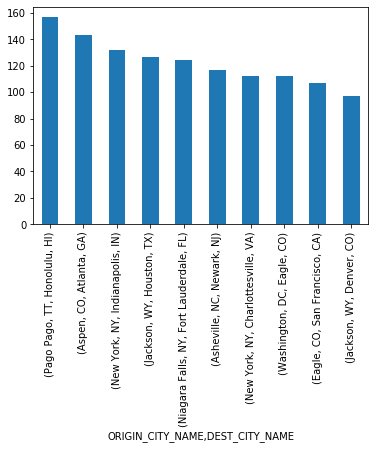

In [18]:
trip_with_delay_2017.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

## Which Airline companies have the most cancellations ?

In [19]:
airline_with_most_cancellations_2017 = data_2017.groupby("OP_UNIQUE_CARRIER")["CANCELLATION_CODE"].apply(lambda x: x.notnull().sum())\
.sort_values(ascending=False).head(10)

In [20]:
airline_with_most_cancellations_2017

OP_UNIQUE_CARRIER
DL    2141
WN    1061
OO     901
EV     356
AA     312
NK     179
AS     125
UA      84
F9      77
B6      44
Name: CANCELLATION_CODE, dtype: int64

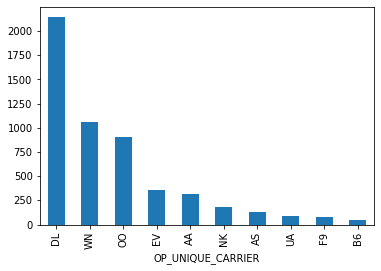

In [21]:
airline_with_most_cancellations_2017.plot(kind='bar', x='OP_UNIQUE_CARRIER')

# most common cause of delays


In [22]:
weather_2017_delays_count = data_2017[data_2017['WEATHER_DELAY'] > 0.0]["WEATHER_DELAY"].notnull().sum()

In [23]:
weather_2017_delays_count

4913

In [24]:
security_2017_delays_count = data_2017[data_2017['SECURITY_DELAY'] > 0.0]['SECURITY_DELAY'].notnull().sum()

In [25]:
security_2017_delays_count

417

In [27]:
late_aircraft_2017_delays_count = data_2017[data_2017['LATE_AIRCRAFT_DELAY'] > 0.0]['LATE_AIRCRAFT_DELAY'].notnull().sum()

In [28]:
late_aircraft_2017_delays_count

44845

In [31]:
carrier_2017_delays_count = data_2017[data_2017['CARRIER_DELAY'] > 0.0]['CARRIER_DELAY'].notnull().sum()

In [32]:
carrier_2017_delays_count

46455

In [33]:
nas_2017_delays_count = data_2017[data_2017['NAS_DELAY'] > 0.0]['NAS_DELAY'].notnull().sum()

In [34]:
nas_2017_delays_count

44392

# Now We need to create a new dataframe with the data we have and then vizualize it

In [41]:
delay_causes_data_2017 = {
    "Delays Causes":  ["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"],
    "Values": [security_2017_delays_count,weather_2017_delays_count,late_aircraft_2017_delays_count,
              carrier_2017_delays_count,nas_2017_delays_count]
   
}

In [42]:
df_delays_causes_2017 = pd.DataFrame(delay_causes_data_2017,
                                index=["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"])

In [43]:
df_delays_causes_2017

Delays Causes  Values
SECURITY_DELAY            SECURITY_DELAY     417
WEATHER_DELAY              WEATHER_DELAY    4913
LATE_AIRCRAFT_DELAY  LATE_AIRCRAFT_DELAY   44845
CARRIER_DELAY              CARRIER_DELAY   46455
NAS_DELAY                      NAS_DELAY   44392

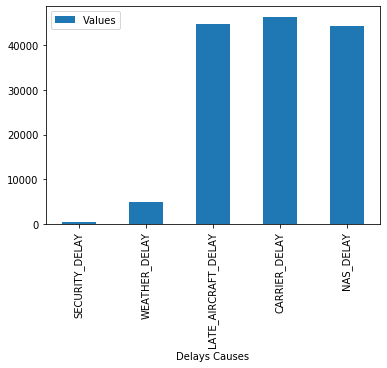

In [44]:
df_delays_causes_2017.plot(kind='bar',x="Delays Causes", y="Values")

# Now We need To repeat the same process for 2018 and 2019 data and then we will summarized our finding

------------------------------------------
# 2018 data analysis
------------------------------------------

In [48]:
data_2018 = pd.read_csv('2018.csv')

In [49]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593842 entries, 0 to 593841
Data columns (total 40 columns):
YEAR                     593842 non-null int64
QUARTER                  593842 non-null int64
MONTH                    593842 non-null int64
DAY_OF_MONTH             593842 non-null int64
DAY_OF_WEEK              593842 non-null int64
FL_DATE                  593842 non-null object
OP_UNIQUE_CARRIER        593842 non-null object
OP_CARRIER_AIRLINE_ID    593842 non-null int64
OP_CARRIER               593842 non-null object
ORIGIN_AIRPORT_ID        593842 non-null int64
ORIGIN_AIRPORT_SEQ_ID    593842 non-null int64
ORIGIN_CITY_MARKET_ID    593842 non-null int64
ORIGIN                   593842 non-null object
ORIGIN_CITY_NAME         593842 non-null object
ORIGIN_STATE_ABR         593842 non-null object
ORIGIN_STATE_FIPS        593842 non-null int64
ORIGIN_STATE_NM          593842 non-null object
ORIGIN_WAC               593842 non-null int64
DEST_AIRPORT_ID          593842 non-

In [51]:
data_2018.describe()

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count  593842.0  593842.0  593842.0  593842.000000  593842.000000   
mean     2018.0       4.0      12.0      16.097708       4.068542   
std         0.0       0.0       0.0       8.882057       2.056023   
min      2018.0       4.0      12.0       1.000000       1.000000   
25%      2018.0       4.0      12.0       8.000000       2.000000   
50%      2018.0       4.0      12.0      16.000000       4.000000   
75%      2018.0       4.0      12.0      24.000000       6.000000   
max      2018.0       4.0      12.0      31.000000       7.000000   

       OP_CARRIER_AIRLINE_ID  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count          593842.000000      593842.000000           5.938420e+05   
mean            19982.960934       12663.819996           1.266386e+06   
std               377.005582        1518.104527           1.518102e+05   
min             19393.000000       10135.000000           1.013505e+06   
25%             19790.000000       11292.000000           1.129202e+06   
50%             19977.000000       12889.000000           1.288903e+06   
75%             20368.000000       13931.000000           1.393102e+06   
max             20452.000000       16218.000000           1.621802e+06   

       ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS  ...       ARR_TIME  \
count          593842.000000      593842.000000  ...  586812.000000   
mean            31754.364932          26.851445  ...    1475.573419   
std              1299.010919          16.455034  ...     529.768351   
min             30070.000000           1.000000  ...       1.000000   
25%             30721.000000          12.000000  ...    1057.000000   
50%             31453.000000          26.000000  ...    1512.000000   
75%             32467.000000          42.000000  ...    1917.000000   
max             35991.000000          78.000000  ...    2400.000000   

           ARR_DELAY  ARR_DELAY_NEW      CANCELLED  CARRIER_DELAY  \
count  585737.000000  585737.000000  593842.000000  108682.000000   
mean        3.345676      12.308557       0.011370      19.622789   
std        45.232506      41.488637       0.106022      59.761106   
min      -117.000000       0.000000       0.000000       0.000000   
25%       -15.000000       0.000000       0.000000       0.000000   
50%        -6.000000       0.000000       0.000000       1.000000   
75%         8.000000       8.000000       0.000000      18.000000   
max      2108.000000    2108.000000       1.000000    1767.000000   

       WEATHER_DELAY      NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
count  108682.000000  108682.000000   108682.000000        108682.000000   
mean        2.993136      13.756777        0.110313            23.981699   
std        30.963814      29.392049        2.653272            47.509043   
min         0.000000       0.000000        0.000000             0.000000   
25%         0.000000       0.000000        0.000000             0.000000   
50%         0.000000       3.000000        0.000000             3.000000   
75%         0.000000      18.000000        0.000000            29.000000   
max      2098.000000    1313.000000      349.000000          1400.000000   

       Unnamed: 39  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 28 columns]

In [52]:
data_2018.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2018        4     12             6            4  2018-12-06   
1  2018        4     12             6            4  2018-12-06   
2  2018        4     12             6            4  2018-12-06   
3  2018        4     12             6            4  2018-12-06   
4  2018        4     12             6            4  2018-12-06   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  ORIGIN_AIRPORT_ID  ...  \
0                DL                  19790         DL              14908  ...   
1                DL                  19790         DL              10423  ...   
2                DL                  19790         DL              12478  ...   
3                DL                  19790         DL              10397  ...   
4                DL                  19790         DL              10529  ...   

   ARR_DELAY  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE CARRIER_DELAY  \
0      -17.0            0.0       0.0               NaN           NaN   
1      -17.0            0.0       0.0               NaN           NaN   
2      -20.0            0.0       0.0               NaN           NaN   
3        3.0            3.0       0.0               NaN           NaN   
4      -25.0            0.0       0.0               NaN           NaN   

   WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 39  
0            NaN       NaN             NaN                  NaN          NaN  
1            NaN       NaN             NaN                  NaN          NaN  
2            NaN       NaN             NaN                  NaN          NaN  
3            NaN       NaN             NaN                  NaN          NaN  
4            NaN       NaN             NaN                  NaN          NaN  

[5 rows x 40 columns]

In [53]:
trip_with_delay_2018 = data_2018.groupby(["ORIGIN_CITY_NAME","DEST_CITY_NAME"])["ARR_DELAY"].mean()\
.sort_values(ascending=False).head(10)

In [54]:
trip_with_delay_2018

ORIGIN_CITY_NAME               DEST_CITY_NAME               
Sun Valley/Hailey/Ketchum, ID  Chicago, IL                      152.000000
Key West, FL                   Dallas/Fort Worth, TX            138.250000
Chicago, IL                    Sun Valley/Hailey/Ketchum, ID    133.000000
Eagle, CO                      Houston, TX                      119.461538
                               Newark, NJ                       114.666667
Greer, SC                      Las Vegas, NV                    114.555556
Denver, CO                     Rapid City, SD                   109.000000
Portsmouth, NH                 Punta Gorda, FL                  105.090909
Greensboro/High Point, NC      Fort Lauderdale, FL              103.555556
Montrose/Delta, CO             Houston, TX                       99.692308
Name: ARR_DELAY, dtype: float64

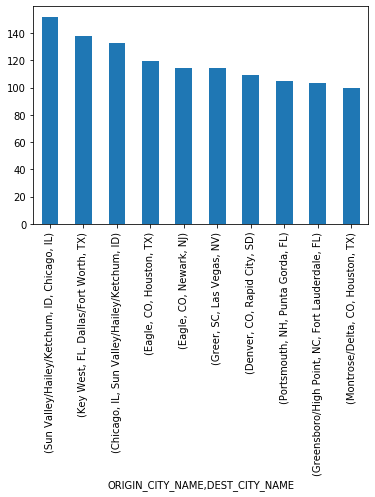

In [55]:
trip_with_delay_2018.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

In [56]:
airline_with_most_cancellations_2018 = data_2018.groupby("OP_UNIQUE_CARRIER")["CANCELLATION_CODE"].apply(lambda x: x.notnull().sum())\
.sort_values(ascending=False).head(10)

In [57]:
airline_with_most_cancellations_2018

OP_UNIQUE_CARRIER
AA    1386
OH    1019
WN     931
OO     848
EV     630
MQ     572
YV     432
YX     243
AS     203
9E     116
Name: CANCELLATION_CODE, dtype: int64

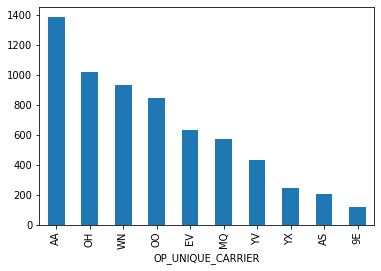

In [58]:
airline_with_most_cancellations_2018.plot(kind='bar', x='OP_UNIQUE_CARRIER')

In [59]:
weather_2018_delays_count = data_2018[data_2018['WEATHER_DELAY'] > 0.0]["WEATHER_DELAY"].notnull().sum()

In [60]:
weather_2018_delays_count

5582

In [61]:
security_2018_delays_count = data_2018[data_2018['SECURITY_DELAY'] > 0.0]['SECURITY_DELAY'].notnull().sum()

In [62]:
security_2018_delays_count

504

In [63]:
late_aircraft_2018_delays_count = data_2018[data_2018['LATE_AIRCRAFT_DELAY'] > 0.0]['LATE_AIRCRAFT_DELAY'].notnull().sum()

In [64]:
late_aircraft_2018_delays_count

56112

In [65]:
carrier_2018_delays_count = data_2018[data_2018['CARRIER_DELAY'] > 0.0]['CARRIER_DELAY'].notnull().sum()

In [66]:
carrier_2018_delays_count

55957

In [67]:
nas_2018_delays_count = data_2018[data_2018['NAS_DELAY'] > 0.0]['NAS_DELAY'].notnull().sum()

In [68]:
nas_2018_delays_count

59514

In [69]:
delay_causes_data_2018 = {
    "Delays Causes":  ["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"],
    "Values": [security_2018_delays_count,weather_2018_delays_count,late_aircraft_2018_delays_count,
              carrier_2018_delays_count,nas_2018_delays_count]
   
}

In [70]:
df_delays_causes_2018 = pd.DataFrame(delay_causes_data_2018,
                                index=["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"])

In [71]:
df_delays_causes_2018

Delays Causes  Values
SECURITY_DELAY            SECURITY_DELAY     504
WEATHER_DELAY              WEATHER_DELAY    5582
LATE_AIRCRAFT_DELAY  LATE_AIRCRAFT_DELAY   56112
CARRIER_DELAY              CARRIER_DELAY   55957
NAS_DELAY                      NAS_DELAY   59514

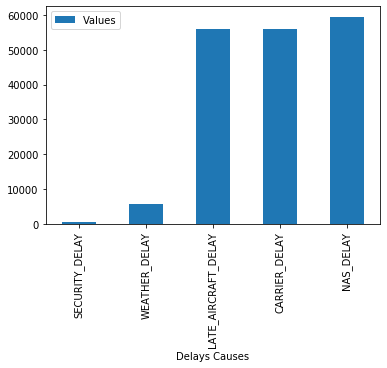

In [72]:
df_delays_causes_2018.plot(kind='bar',x="Delays Causes", y="Values")

In [1]:
df_delays_causes_2018.plot(kind='pie',x="Delays Causes", y="Values")

NameError: name 'df_delays_causes_2018' is not defined

------------------------------------------
# 2019 data analysis
------------------------------------------

In [74]:
data_2019 = pd.read_csv('2019.csv')

In [75]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636014 entries, 0 to 636013
Data columns (total 40 columns):
YEAR                     636014 non-null int64
QUARTER                  636014 non-null int64
MONTH                    636014 non-null int64
DAY_OF_MONTH             636014 non-null int64
DAY_OF_WEEK              636014 non-null int64
FL_DATE                  636014 non-null object
OP_UNIQUE_CARRIER        636014 non-null object
OP_CARRIER_AIRLINE_ID    636014 non-null int64
OP_CARRIER               636014 non-null object
ORIGIN_AIRPORT_ID        636014 non-null int64
ORIGIN_AIRPORT_SEQ_ID    636014 non-null int64
ORIGIN_CITY_MARKET_ID    636014 non-null int64
ORIGIN                   636014 non-null object
ORIGIN_CITY_NAME         636014 non-null object
ORIGIN_STATE_ABR         636014 non-null object
ORIGIN_STATE_FIPS        636014 non-null int64
ORIGIN_STATE_NM          636014 non-null object
ORIGIN_WAC               636014 non-null int64
DEST_AIRPORT_ID          636014 non-

In [76]:
data_2019.describe()

YEAR   QUARTER     MONTH   DAY_OF_MONTH    DAY_OF_WEEK  \
count  636014.0  636014.0  636014.0  636014.000000  636014.000000   
mean     2019.0       4.0      10.0      15.870602       3.854994   
std         0.0       0.0       0.0       8.884372       1.936610   
min      2019.0       4.0      10.0       1.000000       1.000000   
25%      2019.0       4.0      10.0       8.000000       2.000000   
50%      2019.0       4.0      10.0      16.000000       4.000000   
75%      2019.0       4.0      10.0      24.000000       5.000000   
max      2019.0       4.0      10.0      31.000000       7.000000   

       OP_CARRIER_AIRLINE_ID  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  \
count          636014.000000      636014.000000           6.360140e+05   
mean            19985.866814       12637.407793           1.263745e+06   
std               374.079403        1523.093883           1.523092e+05   
min             19393.000000       10135.000000           1.013505e+06   
25%             19790.000000       11292.000000           1.129202e+06   
50%             19977.000000       12889.000000           1.288903e+06   
75%             20368.000000       13930.000000           1.393007e+06   
max             20452.000000       16869.000000           1.686901e+06   

       ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS  ...       ARR_TIME  \
count          636014.000000      636014.000000  ...  630680.000000   
mean            31733.417917          27.169366  ...    1467.272915   
std              1302.167273          16.364479  ...     531.197259   
min             30070.000000           1.000000  ...       1.000000   
25%             30693.000000          12.000000  ...    1051.000000   
50%             31453.000000          26.000000  ...    1505.000000   
75%             32467.000000          42.000000  ...    1913.000000   
max             35991.000000          78.000000  ...    2400.000000   

           ARR_DELAY  ARR_DELAY_NEW      CANCELLED  CARRIER_DELAY  \
count  629637.000000  629637.000000  636014.000000  105046.000000   
mean        2.391511      11.365422       0.008132      19.810083   
std        43.856201      40.411050       0.089810      64.379166   
min       -89.000000       0.000000       0.000000       0.000000   
25%       -15.000000       0.000000       0.000000       0.000000   
50%        -7.000000       0.000000       0.000000       0.000000   
75%         5.000000       5.000000       0.000000      16.000000   
max      2034.000000    2034.000000       1.000000    1933.000000   

       WEATHER_DELAY      NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
count  105046.000000  105046.000000   105046.000000        105046.000000   
mean        2.402843      15.758706        0.071235            24.251138   
std        25.466946      32.730638        2.017558            47.851918   
min         0.000000       0.000000        0.000000             0.000000   
25%         0.000000       0.000000        0.000000             0.000000   
50%         0.000000       3.000000        0.000000             1.000000   
75%         0.000000      20.000000        0.000000            30.000000   
max      1552.000000    1371.000000      198.000000          2010.000000   

       Unnamed: 39  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 28 columns]

In [77]:
data_2019.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2019        4     10             1            2  2019-10-01   
1  2019        4     10             2            3  2019-10-02   
2  2019        4     10             4            5  2019-10-04   
3  2019        4     10             5            6  2019-10-05   
4  2019        4     10             6            7  2019-10-06   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  ORIGIN_AIRPORT_ID  ...  \
0                AA                  19805         AA              11298  ...   
1                AA                  19805         AA              11298  ...   
2                AA                  19805         AA              11298  ...   
3                AA                  19805         AA              11298  ...   
4                AA                  19805         AA              11298  ...   

   ARR_DELAY  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE CARRIER_DELAY  \
0      -25.0            0.0       0.0               NaN           NaN   
1       37.0           37.0       0.0               NaN          37.0   
2      -19.0            0.0       0.0               NaN           NaN   
3       12.0           12.0       0.0               NaN           NaN   
4        2.0            2.0       0.0               NaN           NaN   

   WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 39  
0            NaN       NaN             NaN                  NaN          NaN  
1            0.0       0.0             0.0                  0.0          NaN  
2            NaN       NaN             NaN                  NaN          NaN  
3            NaN       NaN             NaN                  NaN          NaN  
4            NaN       NaN             NaN                  NaN          NaN  

[5 rows x 40 columns]

In [78]:
trip_with_delay_2019 = data_2019.groupby(["ORIGIN_CITY_NAME","DEST_CITY_NAME"])["ARR_DELAY"].mean()\
.sort_values(ascending=False).head(10)

In [79]:
trip_with_delay_2019

ORIGIN_CITY_NAME           DEST_CITY_NAME 
Columbus, OH               Valparaiso, FL     196.125000
Houston, TX                Aspen, CO          191.750000
Valparaiso, FL             Columbus, OH       187.000000
Tucson, AZ                 Provo, UT          169.222222
Provo, UT                  Tucson, AZ         156.111111
Harrisburg, PA             Punta Gorda, FL    131.000000
Newburgh/Poughkeepsie, NY  Punta Gorda, FL    128.875000
Columbia, MO               Denver, CO         127.333333
St. Cloud, MN              Phoenix, AZ        122.250000
San Francisco, CA          Santa Rosa, CA     108.730769
Name: ARR_DELAY, dtype: float64

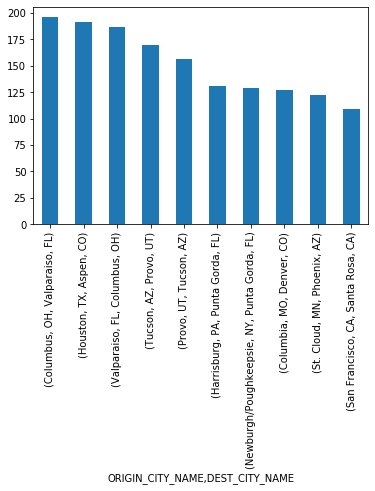

In [80]:
trip_with_delay_2019.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

In [81]:
airline_with_most_cancellations_2019 = data_2019.groupby("OP_UNIQUE_CARRIER")["CANCELLATION_CODE"].apply(lambda x: x.notnull().sum())\
.sort_values(ascending=False).head(10)

In [82]:
airline_with_most_cancellations_2019

OP_UNIQUE_CARRIER
WN    1414
AA     867
OO     725
MQ     420
YV     393
OH     316
F9     188
UA     151
YX     126
AS     121
Name: CANCELLATION_CODE, dtype: int64

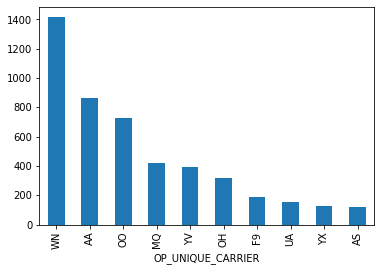

In [83]:
airline_with_most_cancellations_2019.plot(kind='bar', x='OP_UNIQUE_CARRIER')

In [84]:
weather_2019_delays_count = data_2019[data_2019['WEATHER_DELAY'] > 0.0]["WEATHER_DELAY"].notnull().sum()

In [85]:
weather_2019_delays_count

4292

In [86]:
security_2019_delays_count = data_2019[data_2019['SECURITY_DELAY'] > 0.0]['SECURITY_DELAY'].notnull().sum()

In [87]:
security_2019_delays_count

311

In [88]:
late_aircraft_2019_delays_count = data_2019[data_2019['LATE_AIRCRAFT_DELAY'] > 0.0]['LATE_AIRCRAFT_DELAY'].notnull().sum()

In [89]:
late_aircraft_2019_delays_count

53000

In [90]:
carrier_2019_delays_count = data_2019[data_2019['CARRIER_DELAY'] > 0.0]['CARRIER_DELAY'].notnull().sum()

In [91]:
carrier_2019_delays_count

49049

In [92]:
nas_2019_delays_count = data_2019[data_2019['NAS_DELAY'] > 0.0]['NAS_DELAY'].notnull().sum()

In [93]:
nas_2019_delays_count

58108

In [94]:
delay_causes_data_2019 = {
    "Delays Causes":  ["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"],
    "Values": [security_2019_delays_count,weather_2019_delays_count,late_aircraft_2019_delays_count,
              carrier_2019_delays_count,nas_2019_delays_count]
   
}

In [95]:
df_delays_causes_2019 = pd.DataFrame(delay_causes_data_2019,
                                index=["SECURITY_DELAY","WEATHER_DELAY","LATE_AIRCRAFT_DELAY","CARRIER_DELAY","NAS_DELAY"])

In [96]:
df_delays_causes_2019

Delays Causes  Values
SECURITY_DELAY            SECURITY_DELAY     311
WEATHER_DELAY              WEATHER_DELAY    4292
LATE_AIRCRAFT_DELAY  LATE_AIRCRAFT_DELAY   53000
CARRIER_DELAY              CARRIER_DELAY   49049
NAS_DELAY                      NAS_DELAY   58108

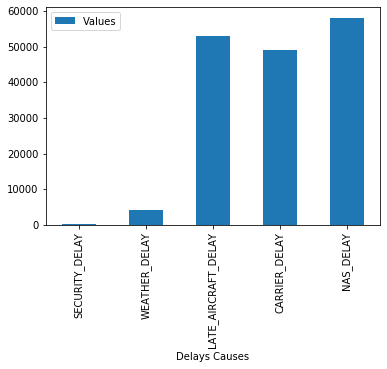

In [97]:
df_delays_causes_2019.plot(kind='bar',x="Delays Causes", y="Values")

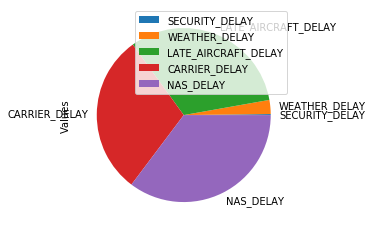

In [98]:
df_delays_causes_2019.plot(kind='pie',x="Delays Causes", y="Values")

# Let Now Summarized Our Finding


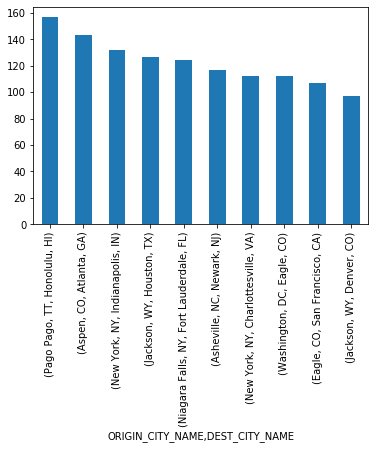

In [103]:
trip_with_delay_2017.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

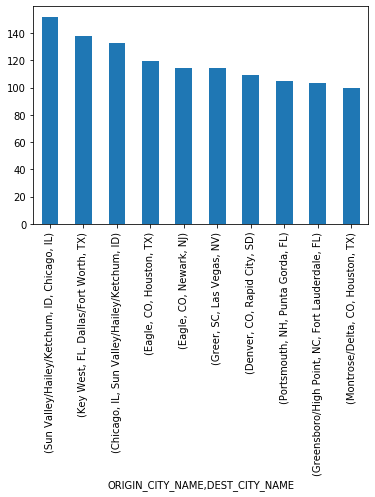

In [104]:
trip_with_delay_2018.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

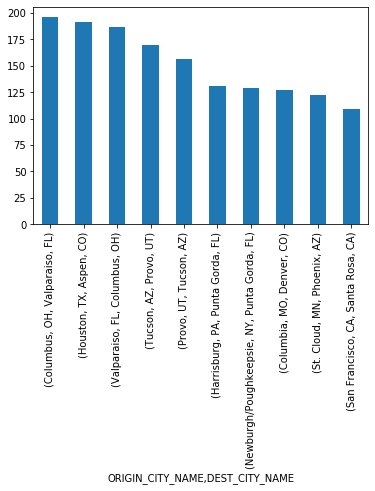

In [105]:
trip_with_delay_2019.plot(kind='bar', x='ORIGIN_CITY_NAME', y='ARR_DELAY')

# Our finding shows the trips that has the most delays in 2017 is different than 2018 and 2019

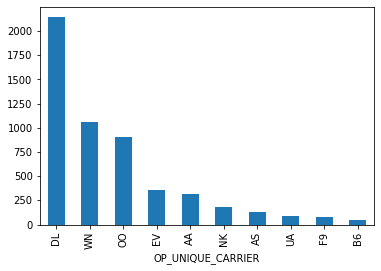

In [107]:
airline_with_most_cancellations_2017.plot(kind='bar', x='OP_UNIQUE_CARRIER')

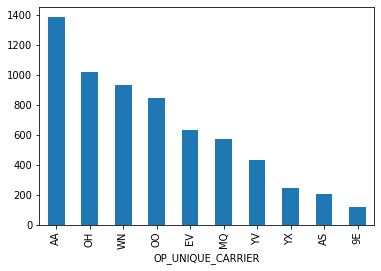

In [108]:
airline_with_most_cancellations_2018.plot(kind='bar', x='OP_UNIQUE_CARRIER')

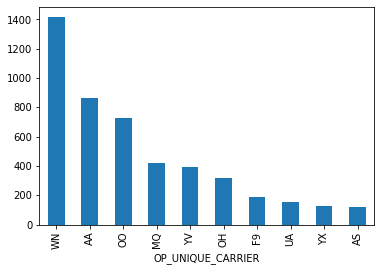

In [109]:
airline_with_most_cancellations_2019.plot(kind='bar', x='OP_UNIQUE_CARRIER')

# Here We can see some airline comming back, such as AA(American Airline),WN(Southwest Airlines),AS(Alaska Airlines) that have the most cancellation those past 3 years

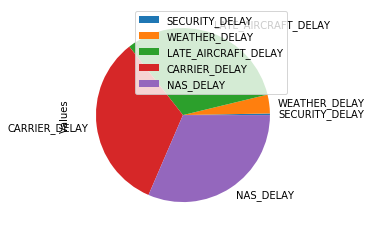

In [110]:
df_delays_causes_2017.plot(kind='pie',x="Delays Causes", y="Values")

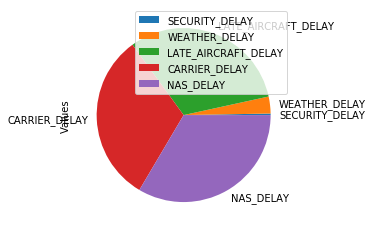

In [111]:
df_delays_causes_2018.plot(kind='pie',x="Delays Causes", y="Values")

In [2]:
df_delays_causes_2019.plot(kind='pie',x="Delays Causes", y="Values")

NameError: name 'df_delays_causes_2019' is not defined

# The Data clearly shows that the reason of the delays is due to the Carrier, Weather, National Air System

------------------------------------------
# Our Prediction

------------------------------------------


------------------------------------------
## We will use linear regression to predict base on the data we have if delays will decrease with time or not
------------------------------------------

### first let merge all the data together

In [113]:
all_data = data_2017.append(data_2018).append(data_2019)

In [114]:
all_data.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2017        4     12             1            5  2017-12-01   
1  2017        4     12             1            5  2017-12-01   
2  2017        4     12             1            5  2017-12-01   
3  2017        4     12             1            5  2017-12-01   
4  2017        4     12             1            5  2017-12-01   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  ORIGIN_AIRPORT_ID  ...  \
0                OO                  20304         OO              12892  ...   
1                OO                  20304         OO              12892  ...   
2                OO                  20304         OO              12892  ...   
3                OO                  20304         OO              13930  ...   
4                OO                  20304         OO              10140  ...   

   ARR_DELAY  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE CARRIER_DELAY  \
0      -24.0            0.0       0.0               NaN           NaN   
1      -17.0            0.0       0.0               NaN           NaN   
2      -16.0            0.0       0.0               NaN           NaN   
3      -13.0            0.0       0.0               NaN           NaN   
4      -23.0            0.0       0.0               NaN           NaN   

   WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 39  
0            NaN       NaN             NaN                  NaN          NaN  
1            NaN       NaN             NaN                  NaN          NaN  
2            NaN       NaN             NaN                  NaN          NaN  
3            NaN       NaN             NaN                  NaN          NaN  
4            NaN       NaN             NaN                  NaN          NaN  

[5 rows x 40 columns]

In [116]:
import statsmodels.api as sm

# We will Replace All NaN with 0 (Data Cleaning)

In [131]:
all_data_clean = all_data.fillna(0)



In [133]:
all_data.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2017        4     12             1            5  2017-12-01   
1  2017        4     12             1            5  2017-12-01   
2  2017        4     12             1            5  2017-12-01   
3  2017        4     12             1            5  2017-12-01   
4  2017        4     12             1            5  2017-12-01   

  OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER  ORIGIN_AIRPORT_ID  ...  \
0                OO                  20304         OO              12892  ...   
1                OO                  20304         OO              12892  ...   
2                OO                  20304         OO              12892  ...   
3                OO                  20304         OO              13930  ...   
4                OO                  20304         OO              10140  ...   

   ARR_DELAY  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE CARRIER_DELAY  \
0      -24.0            0.0       0.0                 0           0.0   
1      -17.0            0.0       0.0                 0           0.0   
2      -16.0            0.0       0.0                 0           0.0   
3      -13.0            0.0       0.0                 0           0.0   
4      -23.0            0.0       0.0                 0           0.0   

   WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 39  
0            0.0       0.0             0.0                  0.0          0.0  
1            0.0       0.0             0.0                  0.0          0.0  
2            0.0       0.0             0.0                  0.0          0.0  
3            0.0       0.0             0.0                  0.0          0.0  
4            0.0       0.0             0.0                  0.0          0.0  

[5 rows x 40 columns]

In [158]:
prediction_aircraft_delay = sm.OLS(all_data["LATE_AIRCRAFT_DELAY"],all_data["WEATHER_DELAY"]).fit()

In [159]:
prediction_security_delay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     LATE_AIRCRAFT_DELAY   R-squared (uncentered):                   0.001
Model:                             OLS   Adj. R-squared (uncentered):              0.001
Method:                  Least Squares   F-statistic:                              1457.
Date:                 Thu, 19 Dec 2019   Prob (F-statistic):                   1.06e-318
Time:                         04:39:42   Log-Likelihood:                     -7.6692e+06
No. Observations:              1694061   AIC:                                  1.534e+07
Df Residuals:                  1694060   BIC:                                  1.534e+07
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
WEATHER_DELAY     0.0503      0.001     38.174      0.000       0.048       0.053
==============================================================================
Omnibus:                  3115034.989   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12453197505.752
Skew:                          13.376   Prob(JB):                         0.00
Kurtosis:                     422.178   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## using the code in the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html) we can vizualize our linear regression

In [160]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Linear Regression')

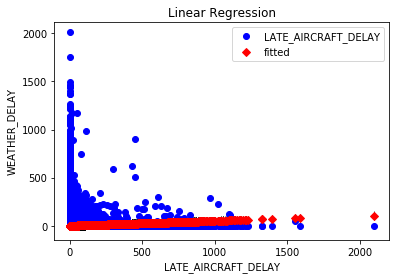

In [161]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(prediction_security_delay, 0, ax=ax)
ax.set_ylabel("WEATHER_DELAY")
ax.set_xlabel("LATE_AIRCRAFT_DELAY")
ax.set_title("Linear Regression")

In [162]:
plt.show()

## here in this relation between weather_delay and late_aircraft we can see clearly that the fitted point going up. So our prediction shows that the delay won't get better

In [163]:
prediction_carrier_delay = sm.OLS(all_data["CARRIER_DELAY"],all_data["WEATHER_DELAY"]).fit()

In [164]:
prediction_carrier_delay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          CARRIER_DELAY   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              21.60
Date:                Thu, 19 Dec 2019   Prob (F-statistic):                    3.37e-06
Time:                        04:40:32   Log-Likelihood:                     -8.0395e+06
No. Observations:             1694061   AIC:                                  1.608e+07
Df Residuals:                 1694060   BIC:                                  1.608e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
WEATHER_DELAY     0.0076      0.002      4.647      0.000       0.004       0.011
==============================================================================
Omnibus:                  3910825.712   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      40821705195.753
Skew:                          22.664   Prob(JB):                         0.00
Kurtosis:                     762.126   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

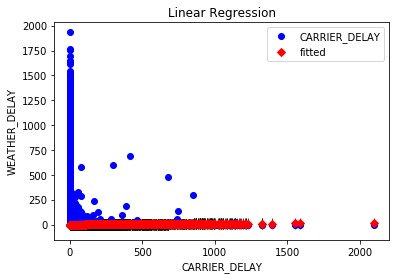

In [167]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(prediction_carrier_delay, 0, ax=ax)
ax.set_ylabel("WEATHER_DELAY")
ax.set_xlabel("CARRIER_DELAY")
ax.set_title("Linear Regression")

In [168]:
plt.show()

# our data predict that the CARRIER_DELAY will remain the same